In [239]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import os

In [240]:
#Get the Working Directory
os.getcwd()

'C:\\Users\\sures\\Project_Python_Basics_Team\\Python_Final_Project\\code'

In [241]:
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
breast_cancer_file = pd.read_csv('Breast-Cancer-Wisconsin.csv')

In [242]:
# Preview the first 5 lines of the loaded data 
breast_cancer_file.head()

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [243]:
#Replace ? with NaN
breast_cancer_file ["A7"] = breast_cancer_file["A7"].replace('?',np.NaN)
print (breast_cancer_file)

         Scn  A2  A3  A4  A5  A6   A7  A8  A9  A10  CLASS
0    1000025   5   1   1   1   2    1   3   1    1      2
1    1002945   5   4   4   5   7   10   3   2    1      2
2    1015425   3   1   1   1   2    2   3   1    1      2
3    1016277   6   8   8   1   3    4   3   7    1      2
4    1017023   4   1   1   3   2    1   3   1    1      2
5    1017122   8  10  10   8   7   10   9   7    1      4
6    1018099   1   1   1   1   2   10   3   1    1      2
7    1018561   2   1   2   1   2    1   3   1    1      2
8    1033078   2   1   1   1   2    1   1   1    5      2
9    1033078   4   2   1   1   2    1   2   1    1      2
10   1035283   1   1   1   1   1    1   3   1    1      2
11   1036172   2   1   1   1   2    1   2   1    1      2
12   1041801   5   3   3   3   2    3   4   4    1      4
13   1043999   1   1   1   1   2    3   3   1    1      2
14   1044572   8   7   5  10   7    9   5   5    4      4
15   1047630   7   4   6   4   6    1   4   3    1      4
16   1048672  

In [244]:
# convert column "A7" of a DataFrame
breast_cancer_file["A7"] = pd.to_numeric(breast_cancer_file['A7'])

In [245]:
#Count Missing Values
missing_value_count = breast_cancer_file["A7"].isnull().sum()
print(missing_value_count)

16


In [246]:
#replace NaN values with mean value of the column 7 and use the parameter skipna=True
breast_cancer_file = breast_cancer_file.fillna(value = breast_cancer_file["A7"].mean(skipna = True))

In [247]:
#Apply the above functions to the entire dataframe
breast_cancer_file_replace_all = breast_cancer_file.replace('?',np.NaN)
convert_numeric_all = breast_cancer_file_replace_all.apply(pd.to_numeric)
convert_mean_all = convert_numeric_all.fillna(convert_numeric_all.mean(skipna = True))

In [248]:
#provide the summary statistic
convert_mean_all.describe(percentiles=None, include=None, exclude=None)

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.601852,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [249]:
# Find the number of rows and columns. use a proper index for column and row (consult pandas). 
# Report how many observations (row) and columns
convert_mean_all.shape
n_rows = convert_mean_all.shape[0]
n_col = convert_mean_all.shape[1]
print("Number of rows:",n_rows,'\n',"Number of columns:", n_col)

Number of rows: 699 
 Number of columns: 11


In [250]:
#Report how many unique id values (column Scn) - hint the length of unique ids
unique_ids = len(convert_mean_all['Scn'].unique()) 
print(unique_ids)

645


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027241F35E48>,
      dtype=object)

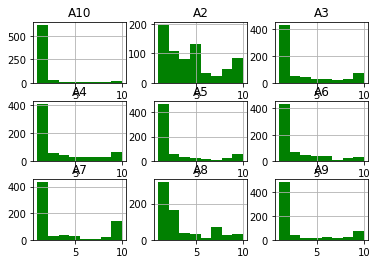

In [251]:
#Draw histograms for columns A2-A10
slice_convert_mean_all = convert_mean_all.loc[:,'A2':'A10']
slice_convert_mean_all.hist(column=None, by=None, grid=True, bins=8,facecolor='green',alpha=2)

In [252]:
 plt.tight_layout(rect=(0, 0, 1.2, 1.2))

<Figure size 432x288 with 0 Axes>

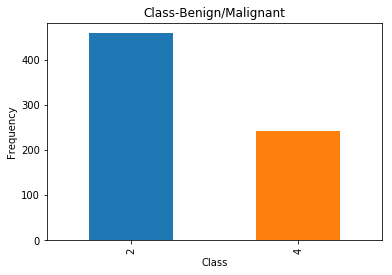

In [253]:
#Draw a bar plot for CLASS - you can use groupby to see counts of  benign and malignant 
#values or you can count values directly using pd.value_counts() function and apply it to plot.bar() function.
pd.value_counts(convert_mean_all["CLASS"]).plot.bar(x=None, y=None)
plt.ylabel('Frequency')
plt.xlabel('Class')
plt.title('Class-Benign/Malignant')
plt.show()

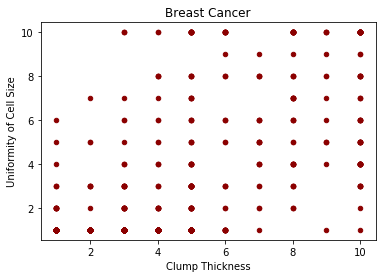

In [254]:
#Draw a scatterplot of any two columns
convert_mean_all.plot.scatter('A2', 'A3', s=None, c='DarkRed')
plt.ylabel('Uniformity of Cell Size')
plt.xlabel('Clump Thickness')
plt.title('Breast Cancer')
plt.show()

In [255]:
# Summary
#1. The data quality seems reasonably good with only 16 values missing
#2. The unique id count of 645 out of 699 indicate not too many replications
#3. The standard deviations of a few columns like A3(uniformity of cell size) and A9 (normal nuclei)seems high
